# Project: Investigate a Dataset - Gapminder World

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusion">Conclusion</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

**Gapminder** has collected a lot of information about how people live their lives in different countries, tracked across the years, and on a number of different indicators. For this project, we consider 4 different indicators to investigate which are (Life Expectancy Years, Total public health spending for person, Mean household income, Pump price for gasoline in USD per liter)


### Questions for Analysis
With aiming to measure the Governments performance towards their people. We are going to investigate the Government's responsibility for public health and its effect on life expectancy years through first 2 datasets mentioned above, in addition to Government succeed in Economy section through measuring the percentage of income spending per person on gasoline by using the last 2 datasets mentioned above.

In [2]:
# import statements for all of the packages that you plan to use.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

##  First Investigation: Public Health

## Data Wrangling

> ### Load total_health_spending_per_person dataset file as health_spending

In [30]:
health_spending = pd.read_csv('total_health_spending_per_person.csv')
health_spending.head()

,country,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.1,29.7,32.1,35.6,36.2,40.4,38.3,45.6,44.5
1,Angola,68.6,43.0,48.1,41.6,44.3,56.3,82.2,63.4,72.1,63.0,71.3,104.0,131.0,191.0,297.0,168.0
2,Albania,106.0,146.0,156.0,184.0,225.0,266.0,279.0,303.0,326.0,380.0,407.0,451.0,494.0,557.0,592.0,577.0
3,Andorra,1470.0,1600.0,1790.0,2320.0,1830.0,1970.0,1950.0,2150.0,2230.0,2330.0,2480.0,2850.0,3020.0,3220.0,3400.0,3260.0
4,United Arab Emirates,953.0,908.0,965.0,1170.0,1090.0,1020.0,992.0,1080.0,1110.0,1070.0,933.0,932.0,945.0,929.0,1960.0,1540.0


In [31]:
health_spending.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  192 non-null    object 
 1   1995     189 non-null    float64
 2   1996     190 non-null    float64
 3   1997     190 non-null    float64
 4   1998     191 non-null    float64
 5   1999     191 non-null    float64
 6   2000     191 non-null    float64
 7   2001     191 non-null    float64
 8   2002     190 non-null    float64
 9   2003     190 non-null    float64
 10  2004     190 non-null    float64
 11  2005     190 non-null    float64
 12  2006     190 non-null    float64
 13  2007     190 non-null    float64
 14  2008     190 non-null    float64
 15  2009     190 non-null    float64
 16  2010     187 non-null    float64
dtypes: float64(16), object(1)
memory usage: 25.6+ KB


> **So we have some columns with null values we need to clean**

In [32]:
health_spending.shape

(192, 17)

> **We can notice that data for total health spending per person is only available from 1995 to 2010, So we will be restricted to this period in our investigation regarding public health**

In [33]:
health_spending.describe()

,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
count,189.000000,190.000000,190.000000,191.000000,191.000000,191.000000,191.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,187.000000
mean,474.236508,496.050421,522.104789,549.775654,566.110524,605.004084,661.290628,697.750947,740.891579,789.965789,826.408421,888.362105,943.028947,1004.928947,1071.694211,1088.806417
std,644.763468,671.373490,704.234162,745.272687,778.736989,837.799466,921.627557,970.611717,1027.071591,1094.720239,1133.760649,1210.434638,1262.046751,1339.903419,1410.336945,1446.101138
min,10.000000,9.870000,9.270000,9.350000,9.710000,9.880000,9.910000,9.880000,11.500000,12.600000,13.200000,14.400000,16.500000,18.200000,15.900000,16.000000
25%,63.600000,66.575000,66.375000,69.550000,71.000000,73.100000,78.500000,78.300000,87.000000,96.600000,106.250000,112.000000,123.500000,130.000000,140.250000,140.500000
50%,199.000000,207.500000,219.000000,235.000000,231.000000,266.000000,279.000000,296.000000,318.000000,328.000000,368.500000,386.500000,411.500000,453.000000,483.000000,481.000000
75%,504.000000,595.250000,576.000000,625.500000,702.000000,736.500000,755.000000,733.000000,775.500000,845.250000,877.250000,951.750000,1072.500000,1182.500000,1330.000000,1295.000000
max,3750.000000,3900.000000,4060.000000,4240.000000,4450.000000,4700.000000,5050.000000,5450.000000,5980.000000,6330.000000,6700.000000,7070.000000,7440.000000,7720.000000,7960.000000,8360.000000


In [34]:
# seting 'country' column as the dataframe index
health_spending = health_spending.set_index('country')
health_spending.head(5)

,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
country,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.1,29.7,32.1,35.6,36.2,40.4,38.3,45.6,44.5
Angola,68.6,43.0,48.1,41.6,44.3,56.3,82.2,63.4,72.1,63.0,71.3,104.0,131.0,191.0,297.0,168.0
Albania,106.0,146.0,156.0,184.0,225.0,266.0,279.0,303.0,326.0,380.0,407.0,451.0,494.0,557.0,592.0,577.0
Andorra,1470.0,1600.0,1790.0,2320.0,1830.0,1970.0,1950.0,2150.0,2230.0,2330.0,2480.0,2850.0,3020.0,3220.0,3400.0,3260.0
United Arab Emirates,953.0,908.0,965.0,1170.0,1090.0,1020.0,992.0,1080.0,1110.0,1070.0,933.0,932.0,945.0,929.0,1960.0,1540.0


> ### Load Life_expectancy_years dataset file as lxy

In [35]:
lxy = pd.read_csv('life_expectancy_years.csv')
lxy.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,28.2,28.2,28.2,28.2,28.2,28.2,28.1,28.1,28.1,...,75.5,75.7,75.8,76.0,76.1,76.2,76.4,76.5,76.6,76.8
1,Angola,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,...,78.8,79.0,79.1,79.2,79.3,79.5,79.6,79.7,79.9,80.0
2,Albania,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,...,87.4,87.5,87.6,87.7,87.8,87.9,88.0,88.2,88.3,88.4
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,United Arab Emirates,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,...,82.4,82.5,82.6,82.7,82.8,82.9,83.0,83.1,83.2,83.3


In [36]:
lxy.shape

(195, 302)

In [37]:
lxy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Columns: 302 entries, country to 2100
dtypes: float64(301), object(1)
memory usage: 460.2+ KB


In [38]:
# seting 'country' column as the dataframe index
lxy = lxy.set_index('country')
lxy.head(5)

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,28.2,28.2,28.2,28.2,28.2,28.2,28.1,28.1,28.1,28.1,...,75.5,75.7,75.8,76.0,76.1,76.2,76.4,76.5,76.6,76.8
Angola,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,...,78.8,79.0,79.1,79.2,79.3,79.5,79.6,79.7,79.9,80.0
Albania,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,...,87.4,87.5,87.6,87.7,87.8,87.9,88.0,88.2,88.3,88.4
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
United Arab Emirates,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,...,82.4,82.5,82.6,82.7,82.8,82.9,83.0,83.1,83.2,83.3



## Data Cleaning
 

> ### Cleaning Total health spending per person dataset

In [39]:
# geting number of rows with null values
sum(health_spending.isnull().any(axis=1))
# as we have just 8 from 192 countries with null values we can neglect this countries data in our investigation

8

In [40]:
health_spending = health_spending.dropna(how='any',axis=0)
sum(health_spending.isnull().any(axis=1))

0

In [41]:
health_spending.head()

,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
country,,,,,,,,,,,,,,,,
Angola,68.6,43.0,48.1,41.6,44.3,56.3,82.2,63.4,72.1,63.0,71.3,104.0,131.0,191.0,297.0,168.0
Albania,106.0,146.0,156.0,184.0,225.0,266.0,279.0,303.0,326.0,380.0,407.0,451.0,494.0,557.0,592.0,577.0
Andorra,1470.0,1600.0,1790.0,2320.0,1830.0,1970.0,1950.0,2150.0,2230.0,2330.0,2480.0,2850.0,3020.0,3220.0,3400.0,3260.0
United Arab Emirates,953.0,908.0,965.0,1170.0,1090.0,1020.0,992.0,1080.0,1110.0,1070.0,933.0,932.0,945.0,929.0,1960.0,1540.0
Argentina,648.0,664.0,753.0,800.0,850.0,839.0,830.0,658.0,724.0,806.0,916.0,1020.0,1130.0,1220.0,1390.0,1290.0


In [42]:
# checking for duplicate values
sum(health_spending.duplicated())

0

In [43]:
health_spending.columns

Index(['1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010'],
      dtype='object')

In [44]:
# adding a new row with the World Average health spending data
health_spending.loc['World_Average'] = health_spending.mean(numeric_only = True)
health_spending.tail()

,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
country,,,,,,,,,,,,,,,,
Samoa,101.000000,122.000000,129.000000,136.000000,157.00000,163.000000,170.000000,172.000000,171.000000,176.000000,190.0000,214.00000,248.000000,249.000000,234.000000,283.000000
Yemen,72.900000,80.000000,83.000000,102.000000,90.70000,89.000000,101.000000,105.000000,131.000000,116.000000,116.0000,133.00000,139.000000,140.000000,139.000000,122.000000
South Africa,431.000000,477.000000,509.000000,532.000000,575.00000,564.000000,606.000000,625.000000,659.000000,706.000000,748.0000,781.00000,832.000000,891.000000,930.000000,935.000000
Zambia,46.700000,52.000000,56.100000,57.200000,51.20000,51.700000,56.500000,65.000000,67.700000,72.000000,81.0000,78.50000,77.000000,85.200000,90.100000,90.200000
World_Average,483.290761,507.593913,535.041359,566.048098,582.92288,622.783043,680.959837,715.241739,759.105978,808.875543,846.3875,909.92663,965.486413,1028.853804,1096.427717,1104.201087


> ### Cleaning Life expectancy years dataset

In [45]:
# trimming dataset to include only data from 1995 to 2010 to be valid in comparison 
# with Total health spending per person dataset
years_to_investigate = list(health_spending.columns)
for x in lxy.columns :
    if x not in years_to_investigate:
        lxy.drop(columns=x, inplace = True)
lxy.head()

,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
country,,,,,,,,,,,,,,,,
Afghanistan,54.3,54.7,54.5,53.3,54.7,54.7,54.8,55.5,56.5,57.1,57.6,58.0,58.5,59.2,59.9,60.5
Angola,51.2,51.7,51.6,50.6,51.9,52.8,53.4,54.5,55.1,55.5,56.4,57.0,58.0,58.8,59.5,60.2
Albania,74.6,74.5,72.9,74.8,75.1,75.4,76.0,75.9,75.6,75.8,76.2,76.9,77.5,77.6,78.0,78.1
Andorra,79.8,80.0,80.2,80.4,80.6,80.8,80.9,81.1,81.2,81.3,81.4,81.5,81.7,81.8,81.8,81.8
United Arab Emirates,68.8,68.9,69.0,69.2,69.2,69.1,69.2,69.4,69.3,69.1,69.2,69.5,70.0,70.4,70.6,70.8


In [46]:
# geting number of rows with null values
sum(lxy.isnull().any(axis=1))

0

In [47]:
# checking for duplicate values
sum(lxy.duplicated())

0

In [48]:
# adding a new row with the World Average Life expectancy years data
lxy.loc['World_Average'] = lxy.mean(numeric_only = True)
lxy.tail()

,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
country,,,,,,,,,,,,,,,,
Yemen,61.100000,61.500000,62.0,62.50000,63.000000,63.500000,64.000000,64.500000,64.900000,65.300000,65.800000,66.200000,66.500000,66.90000,67.200000,67.600000
South Africa,62.900000,61.800000,59.5,58.00000,57.200000,55.600000,54.800000,53.700000,52.700000,52.200000,52.100000,52.300000,53.200000,54.30000,55.700000,57.100000
Zambia,46.800000,46.100000,45.7,45.50000,45.300000,45.300000,45.200000,45.900000,46.600000,47.700000,48.700000,50.000000,51.900000,54.10000,55.700000,56.500000
Zimbabwe,54.200000,52.500000,51.2,49.70000,48.500000,47.500000,47.000000,46.600000,46.400000,46.400000,46.800000,47.400000,48.200000,48.90000,50.200000,52.300000
World_Average,66.590769,66.789744,66.9,67.01641,67.169231,67.489231,67.770769,67.963077,68.207692,68.470769,68.818462,69.181538,69.542564,69.85641,70.205128,70.445128


> ### Removing countries that does not exist in both datasets


In [49]:
# removing countries that does not exist in both datasets
def Unity (df1,df2):
    countries_to_be_removed = [] # countries to be removed from both datasets
    for country in df1.index:
        if country not in df2.index:
            countries_to_be_removed.append(country)
    
    for country in df2.index:
        if country not in df1.index:
            countries_to_be_removed.append(country)
    
    for country in countries_to_be_removed:
        if country in df1.index:
            df1.drop(country,axis=0,inplace=True)
        elif country in df2.index:
            df2.drop(country,axis=0,inplace=True)
    return df1,df2

In [50]:
Unity(lxy,health_spending);

In [51]:
lxy.shape == health_spending.shape

True

<a id='eda'></a>
## Exploratory Data Analysis

> With other parameters are fixed we are going to investigate the effect of health spending on life expectancy through two ways, One by comparing the most spending countries and the lowest ones with their life expectancy over years to investigate if there is an effect of public health spending on life expectancy. The second way to investigate the increase percentage of life expectancy with increasing in health spending.


### Research Question 1 (First Way)

In [52]:
# get the highest countries spending on public health
# by geting the average health spending for each country over the period from 1995 to 2010
health_spending['avg_spending'] = health_spending.mean(axis='columns')
highest_countries = health_spending['avg_spending'].nlargest(n=7)
highest_countries

country
United States    5822.500
Luxembourg       4483.750
Switzerland      3758.750
Norway           3735.000
Monaco           3696.875
Austria          3227.500
Germany          3128.125
Name: avg_spending, dtype: float64

In [53]:
# geting the highest countries with life expectancy
# by geting the average life expectancy for each country over the period from 1995 to 2010
lxy['avg_years'] = lxy.mean(axis='columns')
highest_lxy = lxy['avg_years'].nlargest(n=7)
highest_lxy

country
Japan          82.03125
San Marino     81.50000
Andorra        81.01875
Switzerland    80.97500
Iceland        80.79375
Sweden         80.46875
Australia      80.35000
Name: avg_years, dtype: float64

In [54]:
# geting how many countries from the highest health spedning countries with highest life expectancy
highest_lxy = lxy['avg_years'].nlargest(n=30)
highest_countries = health_spending['avg_spending'].nlargest(n=30)
i = 0
for country in highest_countries.index:
    if country in highest_lxy.index:
        i += 1
        print(i , country)

1 Luxembourg
2 Switzerland
3 Norway
4 Monaco
5 Austria
6 Germany
7 Netherlands
8 Canada
9 Iceland
10 France
11 Belgium
12 Sweden
13 San Marino
14 Australia
15 Ireland
16 Andorra
17 United Kingdom
18 Italy
19 Finland
20 Japan
21 Greece
22 Spain
23 New Zealand
24 Portugal
25 Israel


> ### **Conclusion**: 
From the result above we can find that there are 25 countries from the list of highest health spending countries in the first 30 countries list of highest life expectancy, supporting the assumption that there is a relation between spending on public health and life expectancy. NOTICING that United States, the highest country to spend on public health, is not in the 25 countries list we got, which could be an indicator to other parameters effect on life expectancy, and spending on public health is only one parameter we investigate here.


In [55]:
# get the lowest countries spending on public health
lowest_countries = health_spending['avg_spending'].nsmallest(n=7)
lowest_countries

country
Bangladesh                  13.300625
Congo, Dem. Rep.            15.535000
Myanmar                     22.090625
Eritrea                     23.412500
Ethiopia                    25.768750
Niger                       25.918750
Central African Republic    26.062500
Name: avg_spending, dtype: float64

In [56]:
# geting the highest countries with life expectancy
lxy['avg_years'] = lxy.mean(axis='columns')
lowest_lxy = lxy['avg_years'].nsmallest(n=7)
lowest_lxy

country
Central African Republic    45.02500
Eswatini                    48.40000
Lesotho                     48.45625
Zambia                      48.56250
Malawi                      48.66250
Burundi                     49.10000
Botswana                    49.82500
Name: avg_years, dtype: float64

In [57]:
# geting how many countries from the lowest health spedning countries with lowest life expectancy
lowest_lxy = lxy['avg_years'].nsmallest(n=30)
lowest_countries = health_spending['avg_spending'].nsmallest(n=30)
i = 0
for country in lowest_countries.index:
    if country in lowest_lxy.index:
        i += 1
        print(i , country)

1 Congo, Dem. Rep.
2 Eritrea
3 Ethiopia
4 Niger
5 Central African Republic
6 Mozambique
7 Burundi
8 Tanzania
9 Malawi
10 Guinea
11 Chad
12 Mali
13 Burkina Faso
14 Rwanda
15 Kenya
16 Haiti
17 Zambia


> ### **Conclusion**:
From the result above we can find that there are 17 countries from the list of lowest health spending countries in the last 30 countries list of lowest life expectancy.

### Research Question 2 (Ploting the realtion between health spedning versus life expectancy)

In [58]:
# ploting the realtion between health spedning versus life expectancy
df1 = health_spending.iloc[:,[-1]]
df2 = lxy.iloc[:,[-1]]
df1.head(), df2.head()

(                      avg_spending
 country                           
 Angola                    96.55625
 Albania                  340.56250
 Andorra                 2366.87500
 United Arab Emirates    1099.81250
 Argentina                908.62500,
                       avg_years
 country                        
 Angola                 54.88750
 Albania                75.93125
 Andorra                81.01875
 United Arab Emirates   69.48125
 Argentina              74.59375)

In [59]:
# merge 2 dataframes
df_to_plot = df1.merge(df2, left_on='country',right_on='country')
df_to_plot.head()

,avg_spending,avg_years
country,,
Angola,96.55625,54.88750
Albania,340.56250,75.93125
Andorra,2366.87500,81.01875
United Arab Emirates,1099.81250,69.48125
Argentina,908.62500,74.59375


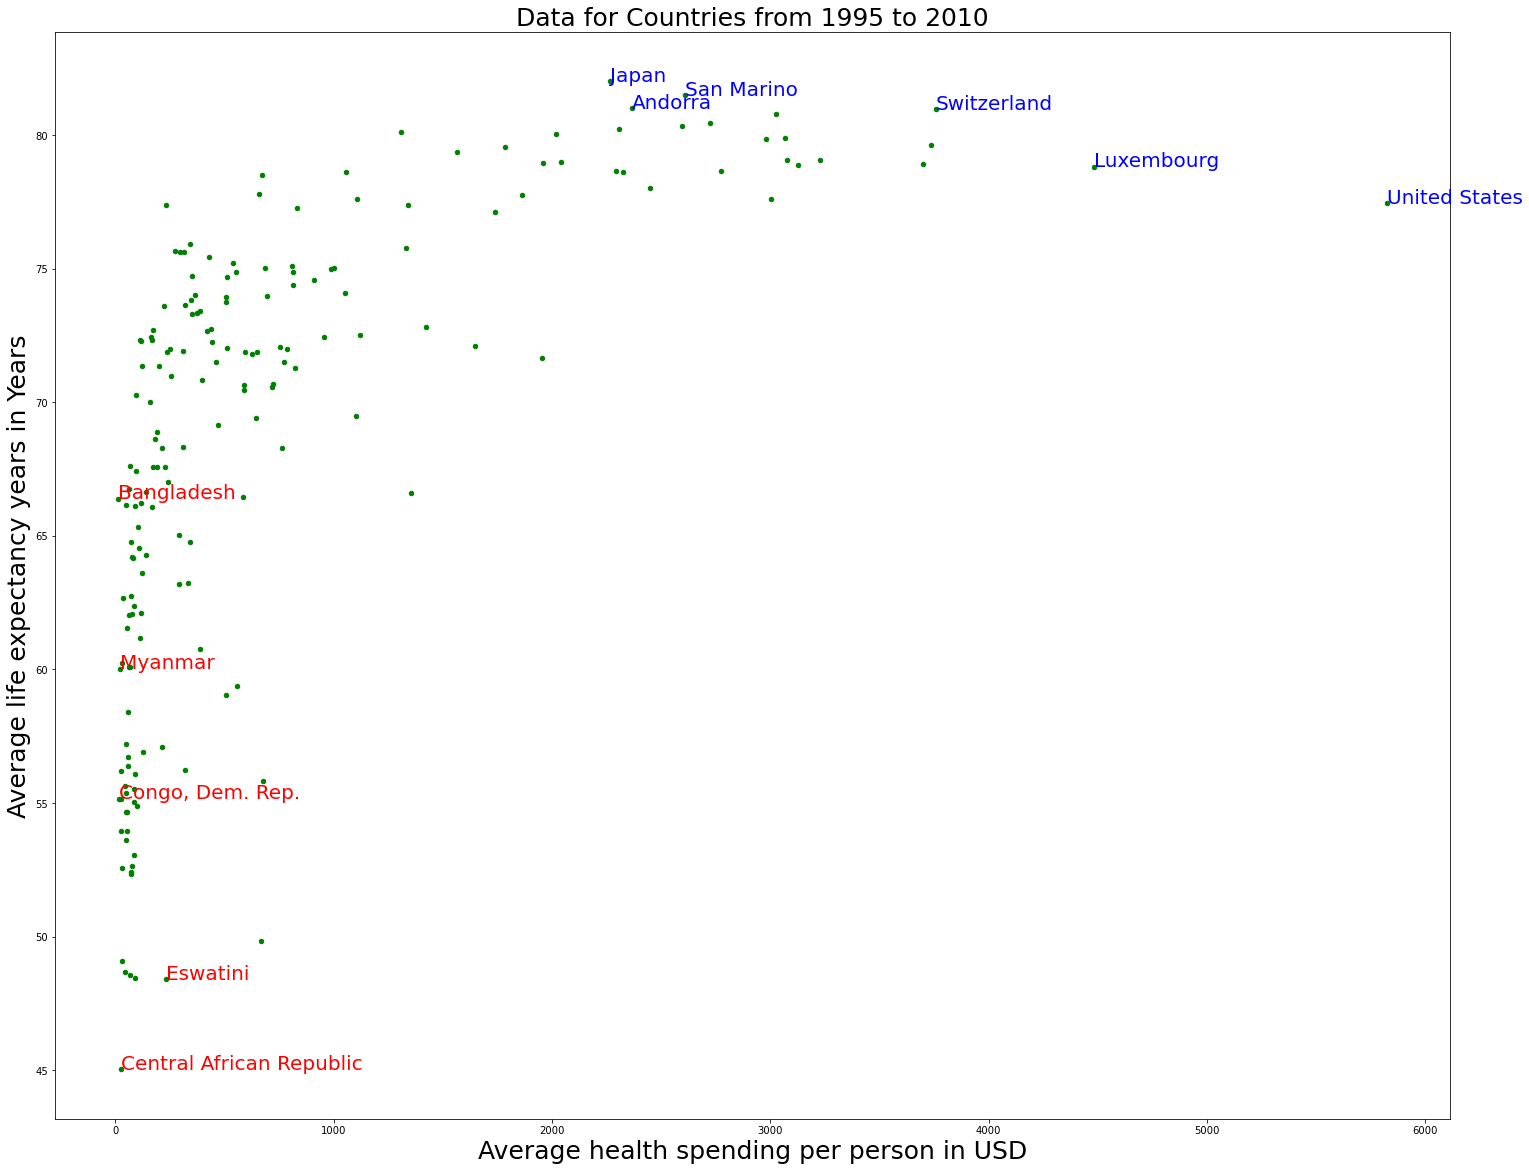

In [62]:
# plot settings 
df_to_plot.plot.scatter(x = 'avg_spending', y ='avg_years', c= 'green', colormap='viridis')
plt.title('Data for Countries from 1995 to 2010', fontsize=25)
plt.xlabel('Average health spending per person in USD', fontsize=25)
plt.ylabel('Average life expectancy years in Years', fontsize=25)
plt.rcParams['figure.figsize'] = [25, 20]

# renames points on sactter plot by selecting only the highest and lowest countries in
# avg_spending and avg_years

for idx, row in  df_to_plot.iterrows():
    if idx in df_to_plot['avg_spending'].nlargest(3) or idx in df_to_plot['avg_years'].nlargest(3):
        plt.text(row['avg_spending'], row['avg_years'], idx, c = 'blue', fontsize=20)
    elif idx in df_to_plot['avg_spending'].nsmallest(3) or idx in df_to_plot['avg_years'].nsmallest(2):
        plt.text(row['avg_spending'], row['avg_years'], idx, c = 'red', fontsize=20)

> For more fair comparison and clear investigation we are going to remove the highest 2 outliers in average health spending per person (United States , Luxembourg).

In [63]:
# removing the highest 2 outliers
df_to_plot.drop(['United States','Luxembourg'],axis=0,inplace=True)
df_to_plot.shape

(181, 2)

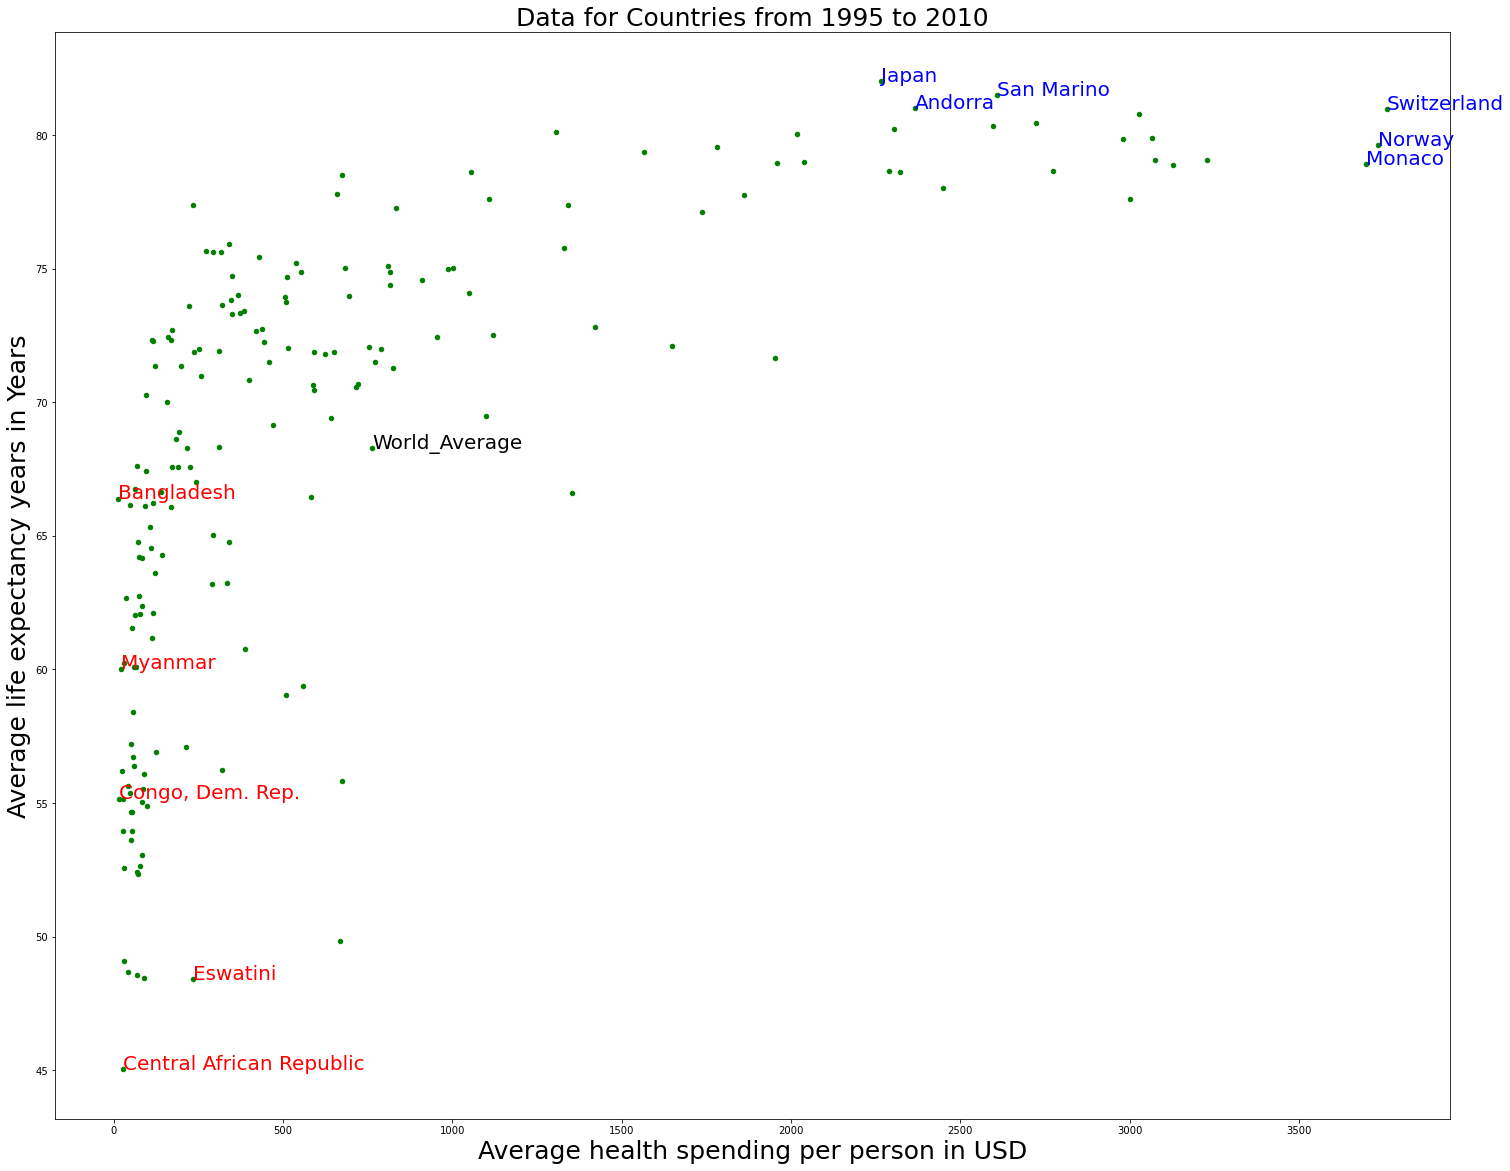

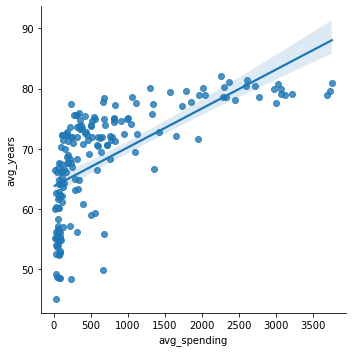

In [65]:
# plot the realtion between health spedning versus life expectancy agin
# plot settings 
df_to_plot.plot.scatter(x = 'avg_spending', y ='avg_years', c= 'green', colormap='viridis')
plt.title('Data for Countries from 1995 to 2010', fontsize = 25)
plt.xlabel('Average health spending per person in USD', fontsize = 25)
plt.ylabel('Average life expectancy years in Years', fontsize = 25)
plt.rcParams['figure.figsize'] = [25, 20];

# renames points on sactter plot by selecting only the highest and lowest countries in
# avg_spending and avg_years

for idx, row in  df_to_plot.iterrows():
    if idx in df_to_plot['avg_spending'].nlargest(3) or idx in df_to_plot['avg_years'].nlargest(3):
        plt.text(row['avg_spending'], row['avg_years'], idx, c = 'blue', fontsize=20)
    elif idx in df_to_plot['avg_spending'].nsmallest(3) or idx in df_to_plot['avg_years'].nsmallest(2):
        plt.text(row['avg_spending'], row['avg_years'], idx, c = 'red', fontsize=20)
    elif idx == 'World_Average':
         plt.text(row['avg_spending'], row['avg_years'], idx, c = 'black', fontsize=20) 

sns.lmplot(x='avg_spending',y='avg_years',data=df_to_plot,fit_reg=True);

> ## Conclusion: 
from the second graph we can find a positive correlation between Average health spending per person and average life expectancy. 
in general, in the first plot, the plot can be divided into 2 parts, the upper part from 70 to above 80 years on the vertical axis which include countries with high life expectancy a high spending on public health. The second part is the left part of the plot from 0 to 500 USD on the horizontal axis at which spending on public health almost has no related effect on life expectancy.

### Research Question 3  (The Second Way)

> Investigate the increase in life expectancy percentage with increasing in public health spending

In [66]:
# calculating change of public health spending over time for each country
health_spending_chane_rate = health_spending.drop(['avg_spending'],axis=1)
hscr = health_spending_chane_rate # for shorten
hscr = hscr.pct_change(axis='columns')
hscr['avg_spending_rate_%']= hscr.mean(axis='columns')*100
hscr['avg_spending_rate_%'].head()

country
Angola                  10.780293
Albania                 12.309108
Andorra                  5.981363
United Arab Emirates     6.078755
Argentina                5.141437
Name: avg_spending_rate_%, dtype: float64

In [67]:
# calculating change of life expectancy over time for each country
lxy_change_rate = lxy.drop(['avg_years'],axis=1)
lxy_change_rate = lxy_change_rate.pct_change(axis='columns')
lxy_change_rate['avg_years_rate_%'] = lxy_change_rate.mean(axis='columns')*100
lxy_change_rate['avg_years_rate_%'].head()

country
Angola                  1.090512
Albania                 0.310526
Andorra                 0.165199
United Arab Emirates    0.191557
Argentina               0.223781
Name: avg_years_rate_%, dtype: float64

In [68]:
# merge the 2 dataframes health_spending_change_rate and life_expectancy_years_change_rate
df_1 = hscr.iloc[:,[-1]]
df_2 = lxy_change_rate.iloc[:,[-1]]
df_to_plot_2 = df_1.merge(df_2, left_on='country',right_on='country')
df_to_plot_2.head()

,avg_spending_rate_%,avg_years_rate_%
country,,
Angola,10.780293,1.090512
Albania,12.309108,0.310526
Andorra,5.981363,0.165199
United Arab Emirates,6.078755,0.191557
Argentina,5.141437,0.223781


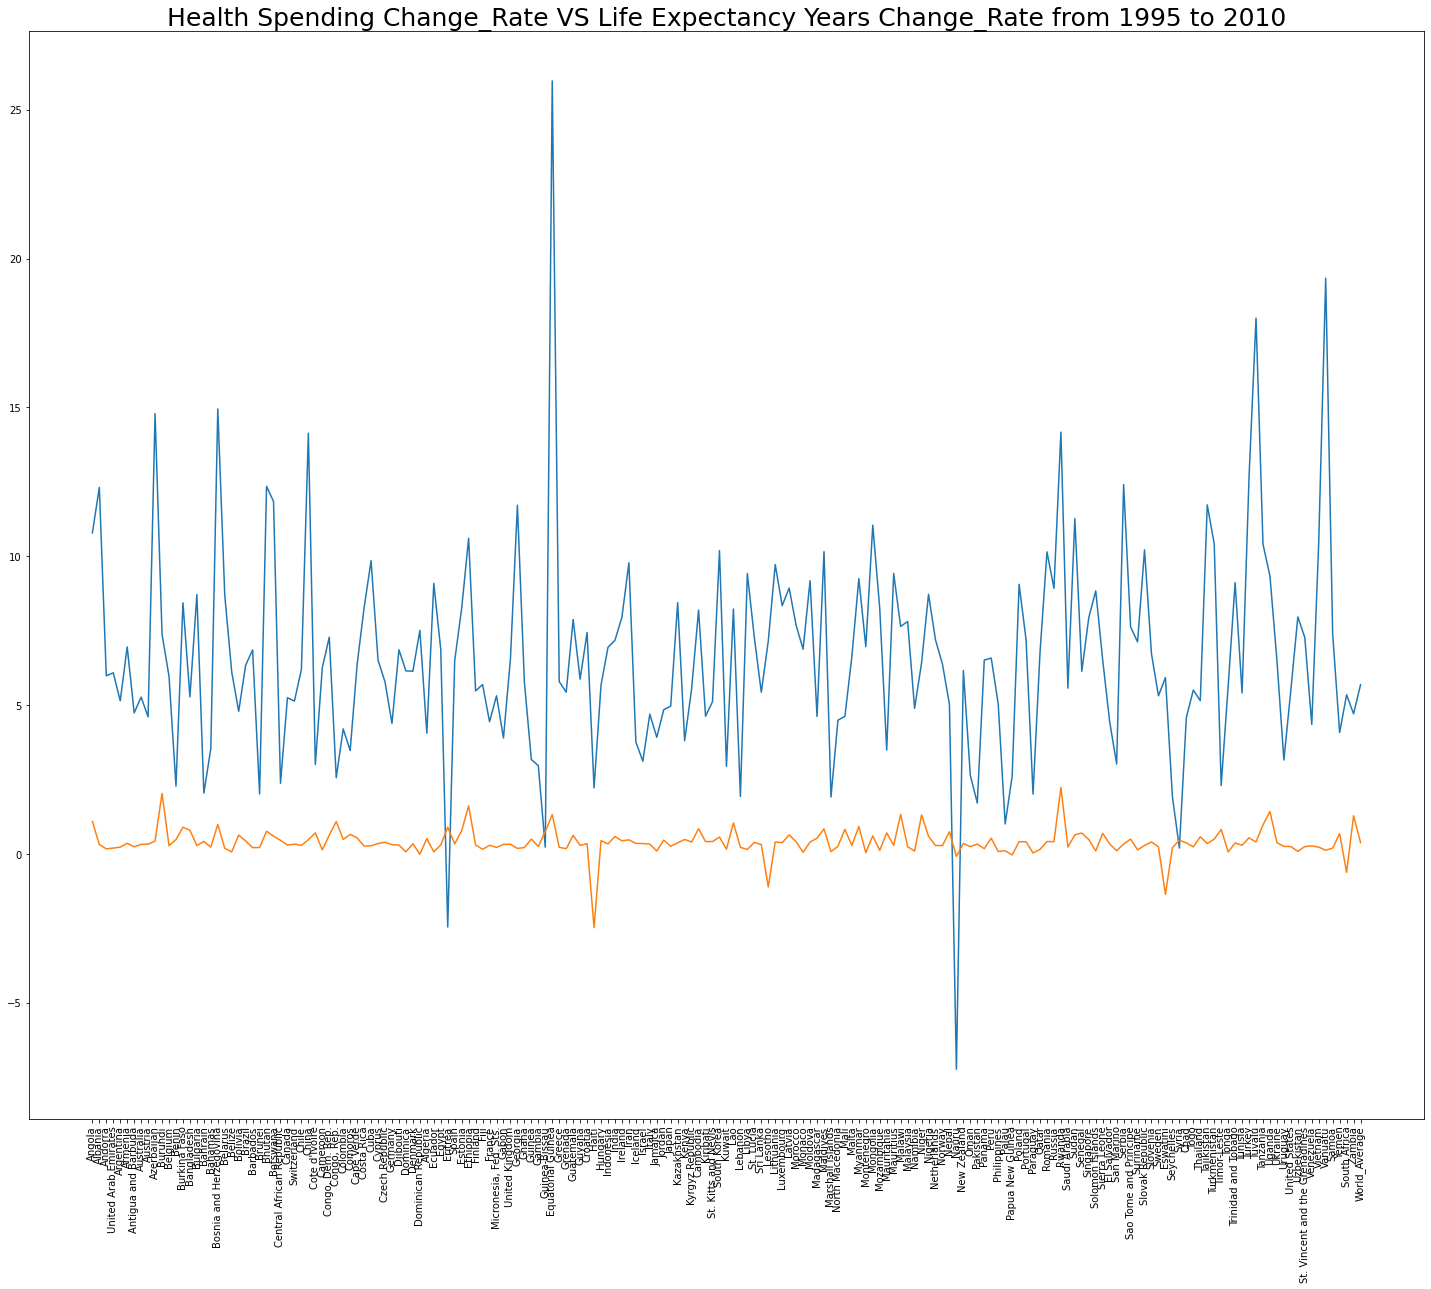

In [69]:
plt.plot(df_to_plot_2,linestyle='solid')
plt.xticks(rotation=90)
plt.title('Health Spending Change_Rate VS Life Expectancy Years Change_Rate from 1995 to 2010',fontsize=25);

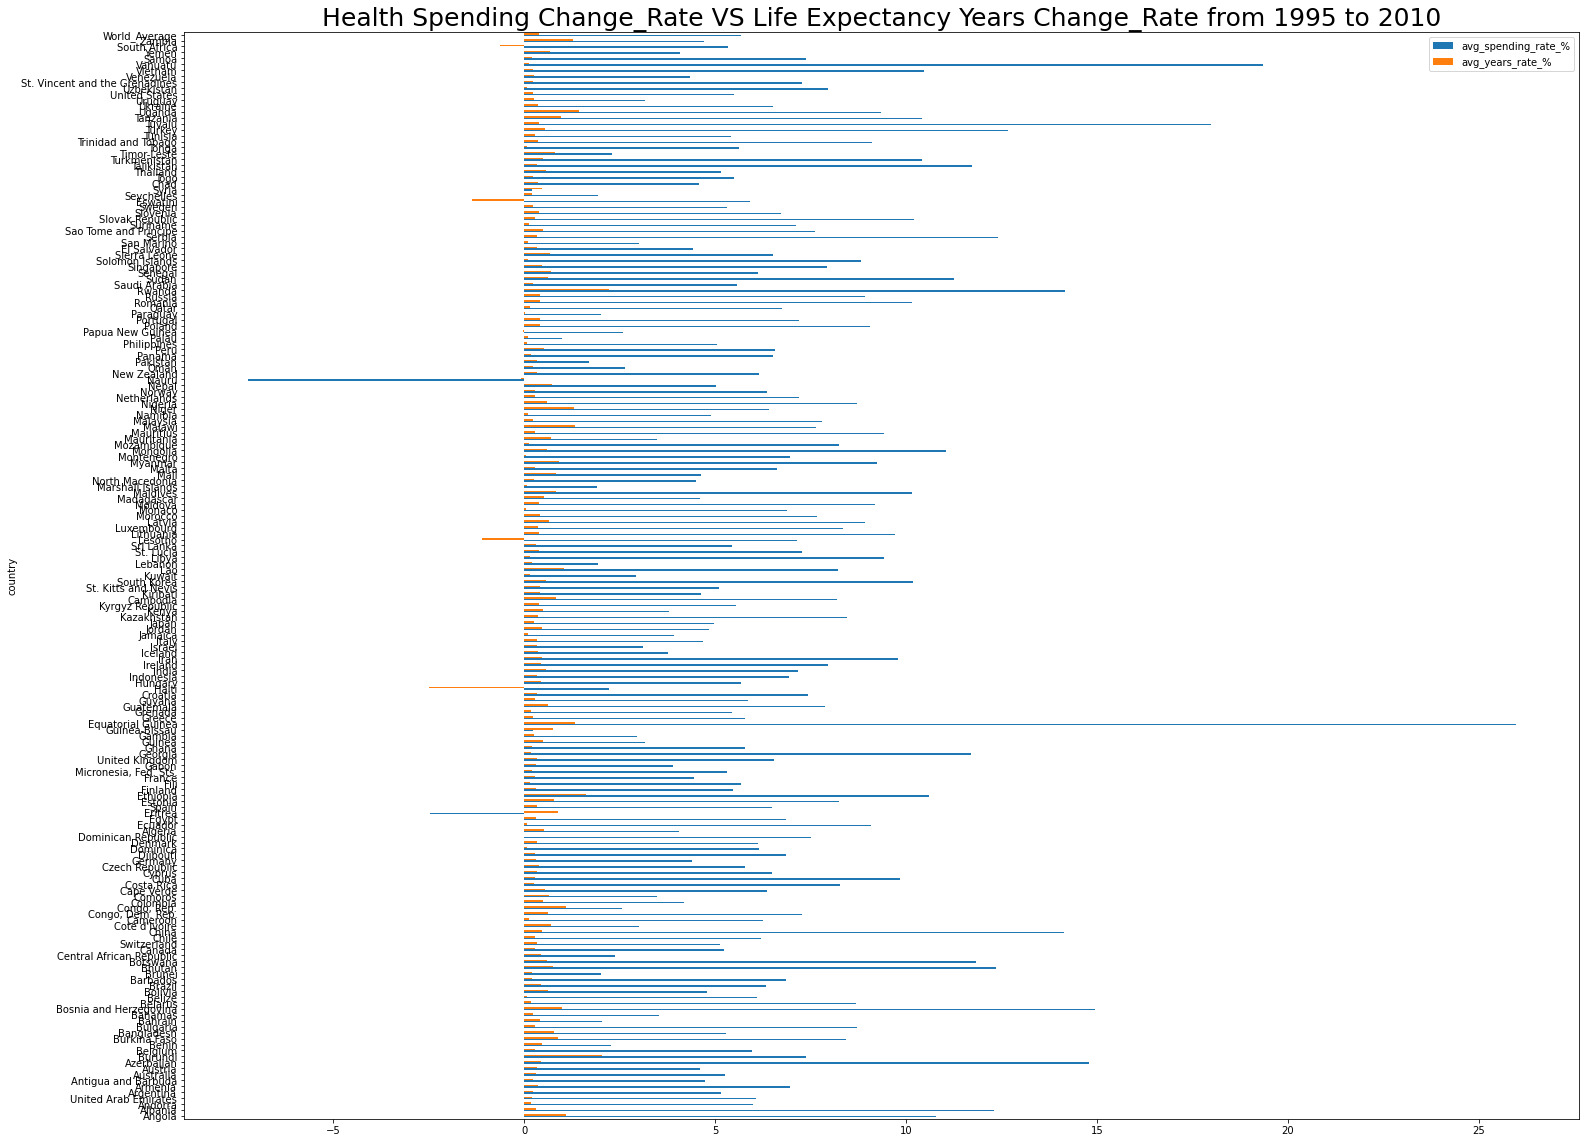

In [70]:
# ploting df_to_plot_2 using lines is not the best way to illustrate relation between life expectancy and health spending
# so Let's try bar
df_to_plot_2.plot(kind='barh')
plt.rcParams['figure.figsize'] = [25, 25]
plt.title('Health Spending Change_Rate VS Life Expectancy Years Change_Rate from 1995 to 2010',fontsize=25);

> ## Conclusion:
With almost all countries increased their public health spending, their life expectancy also increased with different rates which depends on health spending but not along all the way which indicates that there are more parameters to investigate in this case and more inferential statistical analysis need to be done to get accurate and nondeceptive results.

In [71]:
# get overall view using mean of the World_Average to investigate the realtion betwwen 
# average spending rate and average life expectancy years rate 
# also view egypt rates to compare with the world average
df_to_plot_2.loc['World_Average'], df_to_plot_2.loc['Egypt']

(avg_spending_rate_%    5.680400
 avg_years_rate_%       0.375897
 Name: World_Average, dtype: float64,
 avg_spending_rate_%    6.863399
 avg_years_rate_%       0.295543
 Name: Egypt, dtype: float64)

In [72]:
x1,x2 = df_to_plot_2.loc['World_Average'].round(3)
res1 = 'The Global Average of Life Expectancy increased by'
res2 = 'in Spending on Public Health WorldWide over the period from 1995 to 2010'
print(('{} {} % with increase of {} % {}').format(res1,x2,x1,res2))

The Global Average of Life Expectancy increased by 0.376 % with increase of 5.68 % in Spending on Public Health WorldWide over the period from 1995 to 2010


# Second Investigation: The percentage of Income spending on Energy 

## Data Wrangling
> ### Load mean_household_income per year dataset file as income

In [73]:
income = pd.read_csv('mean_household_income.csv')
income.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,456,477,499,522,546,571,571,571,571,...,8500,8680,8870,9060,9250,9450,9660,9860,10.1k,10.3k
1,Angola,150,151,152,153,154,153,154,155,156,...,5890,6020,6150,6280,6410,6550,6690,6840,6980,7130
2,Albania,332,332,332,332,332,332,332,332,332,...,17.2k,17.6k,18k,18.4k,18.8k,19.2k,19.6k,20k,20.4k,20.9k
3,United Arab Emirates,476,500,525,551,578,606,608,610,612,...,150k,153k,156k,159k,163k,166k,170k,174k,177k,181k
4,Argentina,714,747,781,817,854,893,893,893,893,...,52.4k,53.6k,54.7k,55.9k,57.1k,58.3k,59.6k,60.9k,62.2k,63.5k


>* We have some cells with letter 'k' which indicates a thousand and will need to be modified

In [74]:
income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Columns: 302 entries, country to 2100
dtypes: int64(152), object(150)
memory usage: 446.0+ KB


>* and therefore there is some columns with int type and others with object type in the dataset

In [77]:
income.describe()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,1942,1946,1947,1948,1949,1950,1951,1952,1953,1954
count,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,...,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.00000,189.000000
mean,453.984127,457.179894,460.539683,463.989418,467.714286,471.661376,471.936508,472.211640,472.433862,472.656085,...,1427.529101,1466.074074,1523.375661,1577.227513,1625.455026,1682.365079,1720.687831,1747.798942,1801.57672,1859.380952
std,292.787729,293.931439,295.442536,297.041637,299.388602,301.665610,301.733566,301.813945,301.775882,301.693929,...,1325.669817,1384.517143,1452.109636,1460.989797,1488.173779,1565.785728,1595.064150,1611.738816,1648.43237,1702.850499
min,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,...,88.000000,93.000000,94.000000,95.000000,97.000000,98.000000,106.000000,115.000000,124.00000,134.000000
25%,264.000000,268.000000,268.000000,268.000000,268.000000,275.000000,275.000000,275.000000,275.000000,275.000000,...,617.000000,620.000000,630.000000,645.000000,665.000000,673.000000,678.000000,677.000000,732.00000,736.000000
50%,411.000000,414.000000,415.000000,415.000000,415.000000,420.000000,420.000000,420.000000,420.000000,420.000000,...,1020.000000,1060.000000,1050.000000,1110.000000,1180.000000,1240.000000,1290.000000,1330.000000,1360.00000,1370.000000
75%,558.000000,558.000000,558.000000,558.000000,569.000000,571.000000,571.000000,572.000000,573.000000,573.000000,...,1710.000000,1740.000000,1840.000000,1970.000000,2050.000000,2150.000000,2210.000000,2220.000000,2330.00000,2330.000000
max,2130.000000,2130.000000,2130.000000,2130.000000,2130.000000,2130.000000,2130.000000,2130.000000,2130.000000,2130.000000,...,8810.000000,8300.000000,8490.000000,8530.000000,8180.000000,8600.000000,9090.000000,9270.000000,9530.00000,9530.000000


In [78]:
income.shape

(189, 302)

In [79]:
income.describe()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,1942,1946,1947,1948,1949,1950,1951,1952,1953,1954
count,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,...,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.00000,189.000000
mean,453.984127,457.179894,460.539683,463.989418,467.714286,471.661376,471.936508,472.211640,472.433862,472.656085,...,1427.529101,1466.074074,1523.375661,1577.227513,1625.455026,1682.365079,1720.687831,1747.798942,1801.57672,1859.380952
std,292.787729,293.931439,295.442536,297.041637,299.388602,301.665610,301.733566,301.813945,301.775882,301.693929,...,1325.669817,1384.517143,1452.109636,1460.989797,1488.173779,1565.785728,1595.064150,1611.738816,1648.43237,1702.850499
min,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,...,88.000000,93.000000,94.000000,95.000000,97.000000,98.000000,106.000000,115.000000,124.00000,134.000000
25%,264.000000,268.000000,268.000000,268.000000,268.000000,275.000000,275.000000,275.000000,275.000000,275.000000,...,617.000000,620.000000,630.000000,645.000000,665.000000,673.000000,678.000000,677.000000,732.00000,736.000000
50%,411.000000,414.000000,415.000000,415.000000,415.000000,420.000000,420.000000,420.000000,420.000000,420.000000,...,1020.000000,1060.000000,1050.000000,1110.000000,1180.000000,1240.000000,1290.000000,1330.000000,1360.00000,1370.000000
75%,558.000000,558.000000,558.000000,558.000000,569.000000,571.000000,571.000000,572.000000,573.000000,573.000000,...,1710.000000,1740.000000,1840.000000,1970.000000,2050.000000,2150.000000,2210.000000,2220.000000,2330.00000,2330.000000
max,2130.000000,2130.000000,2130.000000,2130.000000,2130.000000,2130.000000,2130.000000,2130.000000,2130.000000,2130.000000,...,8810.000000,8300.000000,8490.000000,8530.000000,8180.000000,8600.000000,9090.000000,9270.000000,9530.00000,9530.000000


>### Load pump_price_for_gasoline_us_per_liter dataset file as gasoline

In [80]:
gasoline = pd.read_csv('pump_price_for_gasoline_us_per_liter.csv')
gasoline.head()

,country,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.05,NaN,1.15,NaN,1.28,NaN,1.07,NaN,0.7
1,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.38,NaN,...,NaN,0.53,NaN,0.65,NaN,0.63,NaN,0.76,NaN,0.97
2,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.86,NaN,...,NaN,1.36,NaN,1.46,NaN,1.81,NaN,1.76,NaN,1.36
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.24,NaN,1.49,NaN,1.67,NaN,1.51,NaN,NaN
4,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.23,NaN,...,NaN,0.45,NaN,0.47,NaN,0.47,NaN,0.47,NaN,0.49


In [81]:
gasoline.shape

(182, 27)

>* gasoline dataset has fewer data than income, so income will need to drop some columns and rows

In [82]:
gasoline.describe()

,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
count,49.000000,54.000000,0.0,0.0,102.000000,0.0,0.0,160.000000,0.0,154.000000,...,163.000000,0.0,172.000000,0.0,170.000000,0.0,166.000000,0.0,172.000000,0.0
mean,0.655306,0.603889,NaN,NaN,0.633824,NaN,NaN,0.570438,NaN,0.615000,...,0.991595,NaN,1.072035,NaN,1.237588,NaN,1.388331,NaN,1.313366,NaN
std,0.298950,0.281106,NaN,NaN,0.293322,NaN,NaN,0.269228,NaN,0.256419,...,0.395029,NaN,0.410579,NaN,0.478569,NaN,0.527634,NaN,0.461955,NaN
min,0.050000,0.020000,NaN,NaN,0.030000,NaN,NaN,0.080000,NaN,0.020000,...,0.020000,NaN,0.020000,NaN,0.023000,NaN,0.023000,NaN,0.015000,NaN
25%,0.450000,0.430000,NaN,NaN,0.382500,NaN,NaN,0.370000,NaN,0.452500,...,0.765000,NaN,0.807500,NaN,0.952500,NaN,1.112500,NaN,1.047500,NaN
50%,0.650000,0.530000,NaN,NaN,0.575000,NaN,NaN,0.535000,NaN,0.595000,...,0.980000,NaN,1.115000,NaN,1.225000,NaN,1.410000,NaN,1.340000,NaN
75%,0.810000,0.735000,NaN,NaN,0.827500,NaN,NaN,0.722500,NaN,0.760000,...,1.260000,NaN,1.350000,NaN,1.587500,NaN,1.767500,NaN,1.592500,NaN
max,1.330000,1.280000,NaN,NaN,1.330000,NaN,NaN,1.360000,NaN,1.460000,...,1.900000,NaN,2.530000,NaN,2.540000,NaN,2.540000,NaN,3.330000,NaN


In [83]:
# gasoline.info() will be discussed in below

## Data Cleaning
> ### Cleaning gasoline dataset

In [84]:
# geting number of rows and columns with null values
sum(gasoline.isnull().any(axis=1)),sum(gasoline.isnull().any(axis=0)), gasoline.shape

(182, 26, (182, 27))

>* with null values in all rows and almost all columns, we can not neglect all null values at onec here.

In [85]:
# get gasoline info
gasoline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 27 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  182 non-null    object 
 1   1991     49 non-null     float64
 2   1992     54 non-null     float64
 3   1993     0 non-null      float64
 4   1994     0 non-null      float64
 5   1995     102 non-null    float64
 6   1996     0 non-null      float64
 7   1997     0 non-null      float64
 8   1998     160 non-null    float64
 9   1999     0 non-null      float64
 10  2000     154 non-null    float64
 11  2001     0 non-null      float64
 12  2002     156 non-null    float64
 13  2003     0 non-null      float64
 14  2004     167 non-null    float64
 15  2005     0 non-null      float64
 16  2006     163 non-null    float64
 17  2007     0 non-null      float64
 18  2008     172 non-null    float64
 19  2009     0 non-null      float64
 20  2010     170 non-null    float64
 21  2011     0 non-n

>* it is obviuos here that the data for gasoline prices is available only for certain years, so we will drop years with 0 non-null values.

In [86]:
# drop all empty columns
gasoline.dropna(how='all', axis=1, inplace=True)
gasoline.head()

,country,1991,1992,1995,1998,2000,2002,2004,2006,2008,2010,2012,2014,2016
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,0.34,0.53,0.68,1.05,1.15,1.28,1.07,0.7
1,Angola,NaN,NaN,NaN,0.38,0.30,0.19,0.39,0.50,0.53,0.65,0.63,0.76,0.97
2,Albania,NaN,NaN,NaN,0.86,0.57,0.80,1.23,1.44,1.36,1.46,1.81,1.76,1.36
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.24,1.49,1.67,1.51,NaN
4,United Arab Emirates,NaN,NaN,NaN,0.23,0.25,0.29,0.28,0.37,0.45,0.47,0.47,0.47,0.49


In [87]:
gasoline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  182 non-null    object 
 1   1991     49 non-null     float64
 2   1992     54 non-null     float64
 3   1995     102 non-null    float64
 4   1998     160 non-null    float64
 5   2000     154 non-null    float64
 6   2002     156 non-null    float64
 7   2004     167 non-null    float64
 8   2006     163 non-null    float64
 9   2008     172 non-null    float64
 10  2010     170 non-null    float64
 11  2012     166 non-null    float64
 12  2014     172 non-null    float64
 13  2016     168 non-null    object 
dtypes: float64(12), object(2)
memory usage: 20.0+ KB


In [88]:
# converting the type of last column to float
gasoline['2016'] = pd.to_numeric(gasoline['2016'], errors='coerce')

In [89]:
gasoline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  182 non-null    object 
 1   1991     49 non-null     float64
 2   1992     54 non-null     float64
 3   1995     102 non-null    float64
 4   1998     160 non-null    float64
 5   2000     154 non-null    float64
 6   2002     156 non-null    float64
 7   2004     167 non-null    float64
 8   2006     163 non-null    float64
 9   2008     172 non-null    float64
 10  2010     170 non-null    float64
 11  2012     166 non-null    float64
 12  2014     172 non-null    float64
 13  2016     167 non-null    float64
dtypes: float64(13), object(1)
memory usage: 20.0+ KB


>* still the first 3 columns have not enough and less data than other columns, so we are going to drop them and the rest columns can be fill with mean of columns before and after that column i.e that year.

In [90]:
# drop first 3 columns
gasoline.drop(columns=['1991','1992','1995'],axis=1,inplace=True)
gasoline.head()

,country,1998,2000,2002,2004,2006,2008,2010,2012,2014,2016
0,Afghanistan,NaN,NaN,0.34,0.53,0.68,1.05,1.15,1.28,1.07,0.70
1,Angola,0.38,0.30,0.19,0.39,0.50,0.53,0.65,0.63,0.76,0.97
2,Albania,0.86,0.57,0.80,1.23,1.44,1.36,1.46,1.81,1.76,1.36
3,Andorra,NaN,NaN,NaN,NaN,NaN,1.24,1.49,1.67,1.51,NaN
4,United Arab Emirates,0.23,0.25,0.29,0.28,0.37,0.45,0.47,0.47,0.47,0.49


In [91]:
# investigate rows with null values
gasoline.isnull().sum(axis=1).value_counts()

0    132
1     17
2     10
3      5
6      4
5      4
9      4
7      3
8      2
4      1
dtype: int64

>* In gasoline dataset we have 10 columns with 10 values for every row. from above and with small number of rows with 6 null values or more (13 from 182 rows) we can remove this rows from gasoline dataset as it will be inaccurate to iterate over them to find the mean for filling null cells.

In [92]:
# delete rows with 6 null values or more
for country_index in range(0,gasoline.shape[0],1):
    x = gasoline.loc[country_index].isnull().sum()
    if x >= 6:
        gasoline.drop([country_index], inplace = True )
gasoline.isnull().sum(axis=1).value_counts()

0    132
1     17
2     10
3      5
5      4
4      1
dtype: int64

In [94]:
gasoline.interpolate(method ='linear', axis = 0, inplace=True)
gasoline.isnull().sum(axis=1).value_counts()

0    168
2      1
dtype: int64

In [95]:
# remove the row with 2 null values which is the first row because there is 2 adjacent cells their data not available
gasoline.drop([0],inplace=True)
gasoline.isnull().sum(axis=1).value_counts()

0    168
dtype: int64

In [96]:
# checking for duplicate values
sum(gasoline.duplicated())

0

In [97]:
gasoline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168 entries, 1 to 181
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  168 non-null    object 
 1   1998     168 non-null    float64
 2   2000     168 non-null    float64
 3   2002     168 non-null    float64
 4   2004     168 non-null    float64
 5   2006     168 non-null    float64
 6   2008     168 non-null    float64
 7   2010     168 non-null    float64
 8   2012     168 non-null    float64
 9   2014     168 non-null    float64
 10  2016     168 non-null    float64
dtypes: float64(10), object(1)
memory usage: 15.8+ KB


> ### Cleaning income dataset

In [98]:
# include only years thats appears in gasoline prices dataset
income = income[gasoline.columns]

In [99]:
# checking for duplicate values
sum(income.duplicated())

0

In [101]:
# converting letter 'k' which indicates a thousand and converting year columns type to float
for year in income.columns[1:]:
    income.loc[:,year] = income.loc[:,year].replace({'K':'*1000', 'k':'*1000'}, regex = True).map(pd.eval).astype(float);

In [102]:
income.head()

,country,1998,2000,2002,2004,2006,2008,2010,2012,2014,2016
0,Afghanistan,905.0,920.0,1010.0,1010.0,1100.0,1230.0,1530.0,1660.0,1810.0,1740.0
1,Angola,848.0,850.0,772.0,839.0,1120.0,1450.0,1570.0,1570.0,1650.0,1660.0
2,Albania,2260.0,2260.0,2260.0,2480.0,2690.0,2850.0,2780.0,2700.0,2780.0,2920.0
3,United Arab Emirates,60000.0,61500.0,59600.0,58100.0,53600.0,51300.0,34000.0,29800.0,35200.0,33400.0
4,Argentina,9320.0,8880.0,7010.0,8120.0,9470.0,10900.0,11200.0,12100.0,11800.0,11800.0


In [103]:
income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  189 non-null    object 
 1   1998     189 non-null    float64
 2   2000     189 non-null    float64
 3   2002     189 non-null    float64
 4   2004     189 non-null    float64
 5   2006     189 non-null    float64
 6   2008     189 non-null    float64
 7   2010     189 non-null    float64
 8   2012     189 non-null    float64
 9   2014     189 non-null    float64
 10  2016     189 non-null    float64
dtypes: float64(10), object(1)
memory usage: 16.4+ KB


In [104]:
# checking for null values in rows and columns with 
income.isnull().sum(axis=1).value_counts()

0    189
dtype: int64

> ### Removing countries that does not exist in both datasets


In [105]:
# seting 'country' column as the dataframe index for both datasets
income = income.set_index('country')
gasoline = gasoline.set_index('country')

In [107]:
# removing countries that do not exist in both datasets
Unity(income,gasoline);

In [108]:
gasoline.shape == income.shape, income.shape

(True, (166, 10))

## Exploratory Data Analysis

### Research Question (Percentage of Income spent on gasoline yearly) (USD per person for 100 liter)

In [109]:
gasoline.head()

,1998,2000,2002,2004,2006,2008,2010,2012,2014,2016
country,,,,,,,,,,
Angola,0.38,0.30,0.19,0.39,0.50,0.53,0.65,0.63,0.76,0.97
Albania,0.86,0.57,0.80,1.23,1.44,1.36,1.46,1.81,1.76,1.36
United Arab Emirates,0.23,0.25,0.29,0.28,0.37,0.45,0.47,0.47,0.47,0.49
Argentina,0.94,1.07,0.63,0.63,0.62,0.78,0.96,1.46,1.52,1.10
Armenia,0.49,0.55,0.42,0.68,0.96,1.08,1.08,1.25,1.30,0.77


In [110]:
income.head()

,1998,2000,2002,2004,2006,2008,2010,2012,2014,2016
country,,,,,,,,,,
Angola,848.0,850.0,772.0,839.0,1120.0,1450.0,1570.0,1570.0,1650.0,1660.0
Albania,2260.0,2260.0,2260.0,2480.0,2690.0,2850.0,2780.0,2700.0,2780.0,2920.0
United Arab Emirates,60000.0,61500.0,59600.0,58100.0,53600.0,51300.0,34000.0,29800.0,35200.0,33400.0
Argentina,9320.0,8880.0,7010.0,8120.0,9470.0,10900.0,11200.0,12100.0,11800.0,11800.0
Armenia,1610.0,1430.0,1460.0,1870.0,2070.0,2290.0,1990.0,2140.0,2310.0,2540.0


In [111]:
# Get percentage of Income spent on gasoline by divide gasoline dataset and income dataset 
# and multiply result dataframe by 100 liter to form percentage of Income spent per person on gasoline 
# in USD/100 Liter yearly.
data = pd.DataFrame(gasoline.values*100 / income.values, columns=gasoline.columns, index=gasoline.index)*100
data.head()

,1998,2000,2002,2004,2006,2008,2010,2012,2014,2016
country,,,,,,,,,,
Angola,4.481132,3.529412,2.461140,4.648391,4.464286,3.655172,4.140127,4.012739,4.606061,5.843373
Albania,3.805310,2.522124,3.539823,4.959677,5.353160,4.771930,5.251799,6.703704,6.330935,4.657534
United Arab Emirates,0.038333,0.040650,0.048658,0.048193,0.069030,0.087719,0.138235,0.157718,0.133523,0.146707
Argentina,1.008584,1.204955,0.898716,0.775862,0.654699,0.715596,0.857143,1.206612,1.288136,0.932203
Armenia,3.043478,3.846154,2.876712,3.636364,4.637681,4.716157,5.427136,5.841121,5.627706,3.031496


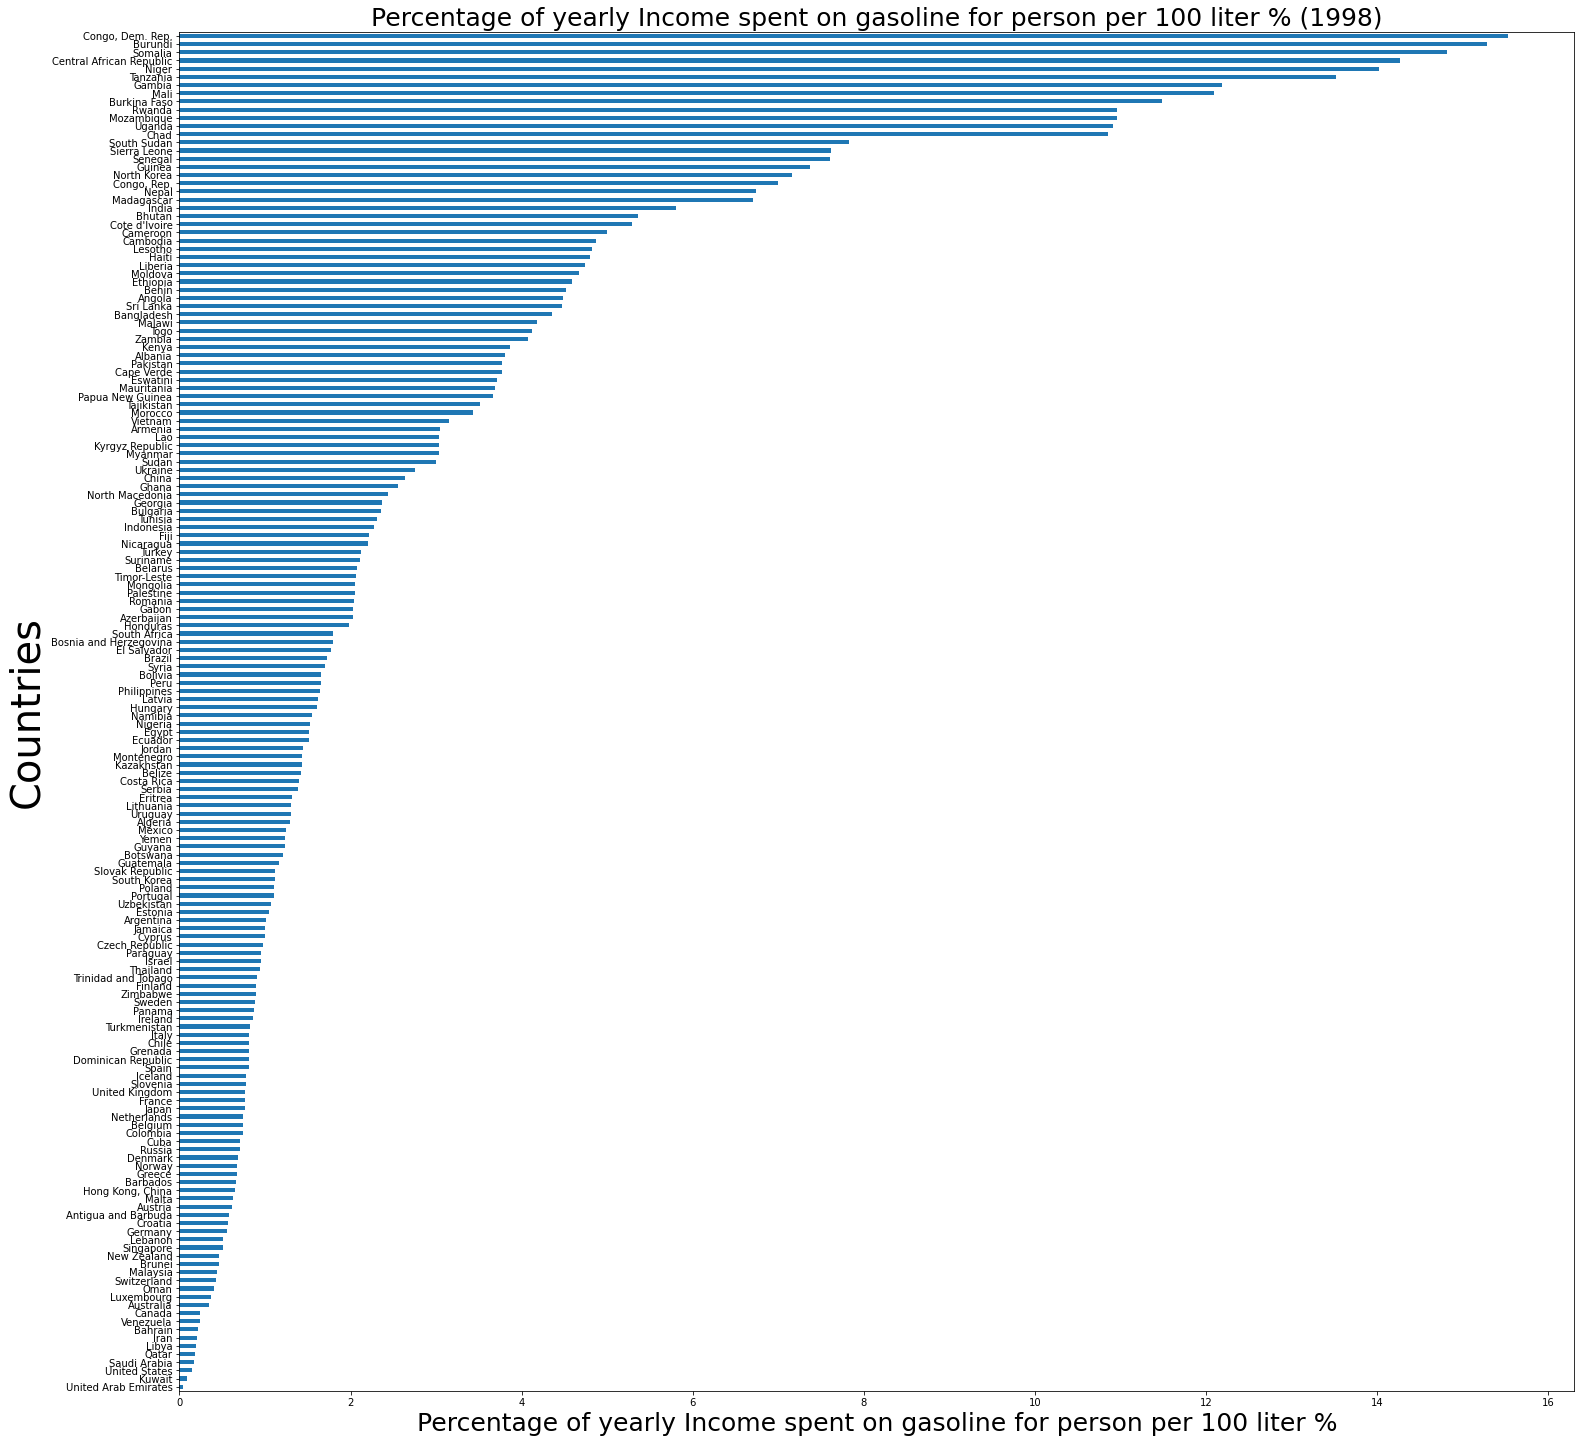

In [112]:
# draw 1998 data
data['1998'].sort_values().plot(kind='barh');
plt.rcParams['figure.figsize'] = [25, 50];
plt.title('Percentage of yearly Income spent on gasoline for person per 100 liter % (1998)',fontsize=25);
plt.xlabel('Percentage of yearly Income spent on gasoline for person per 100 liter %',fontsize=25);
plt.ylabel('Countries',fontsize=40);

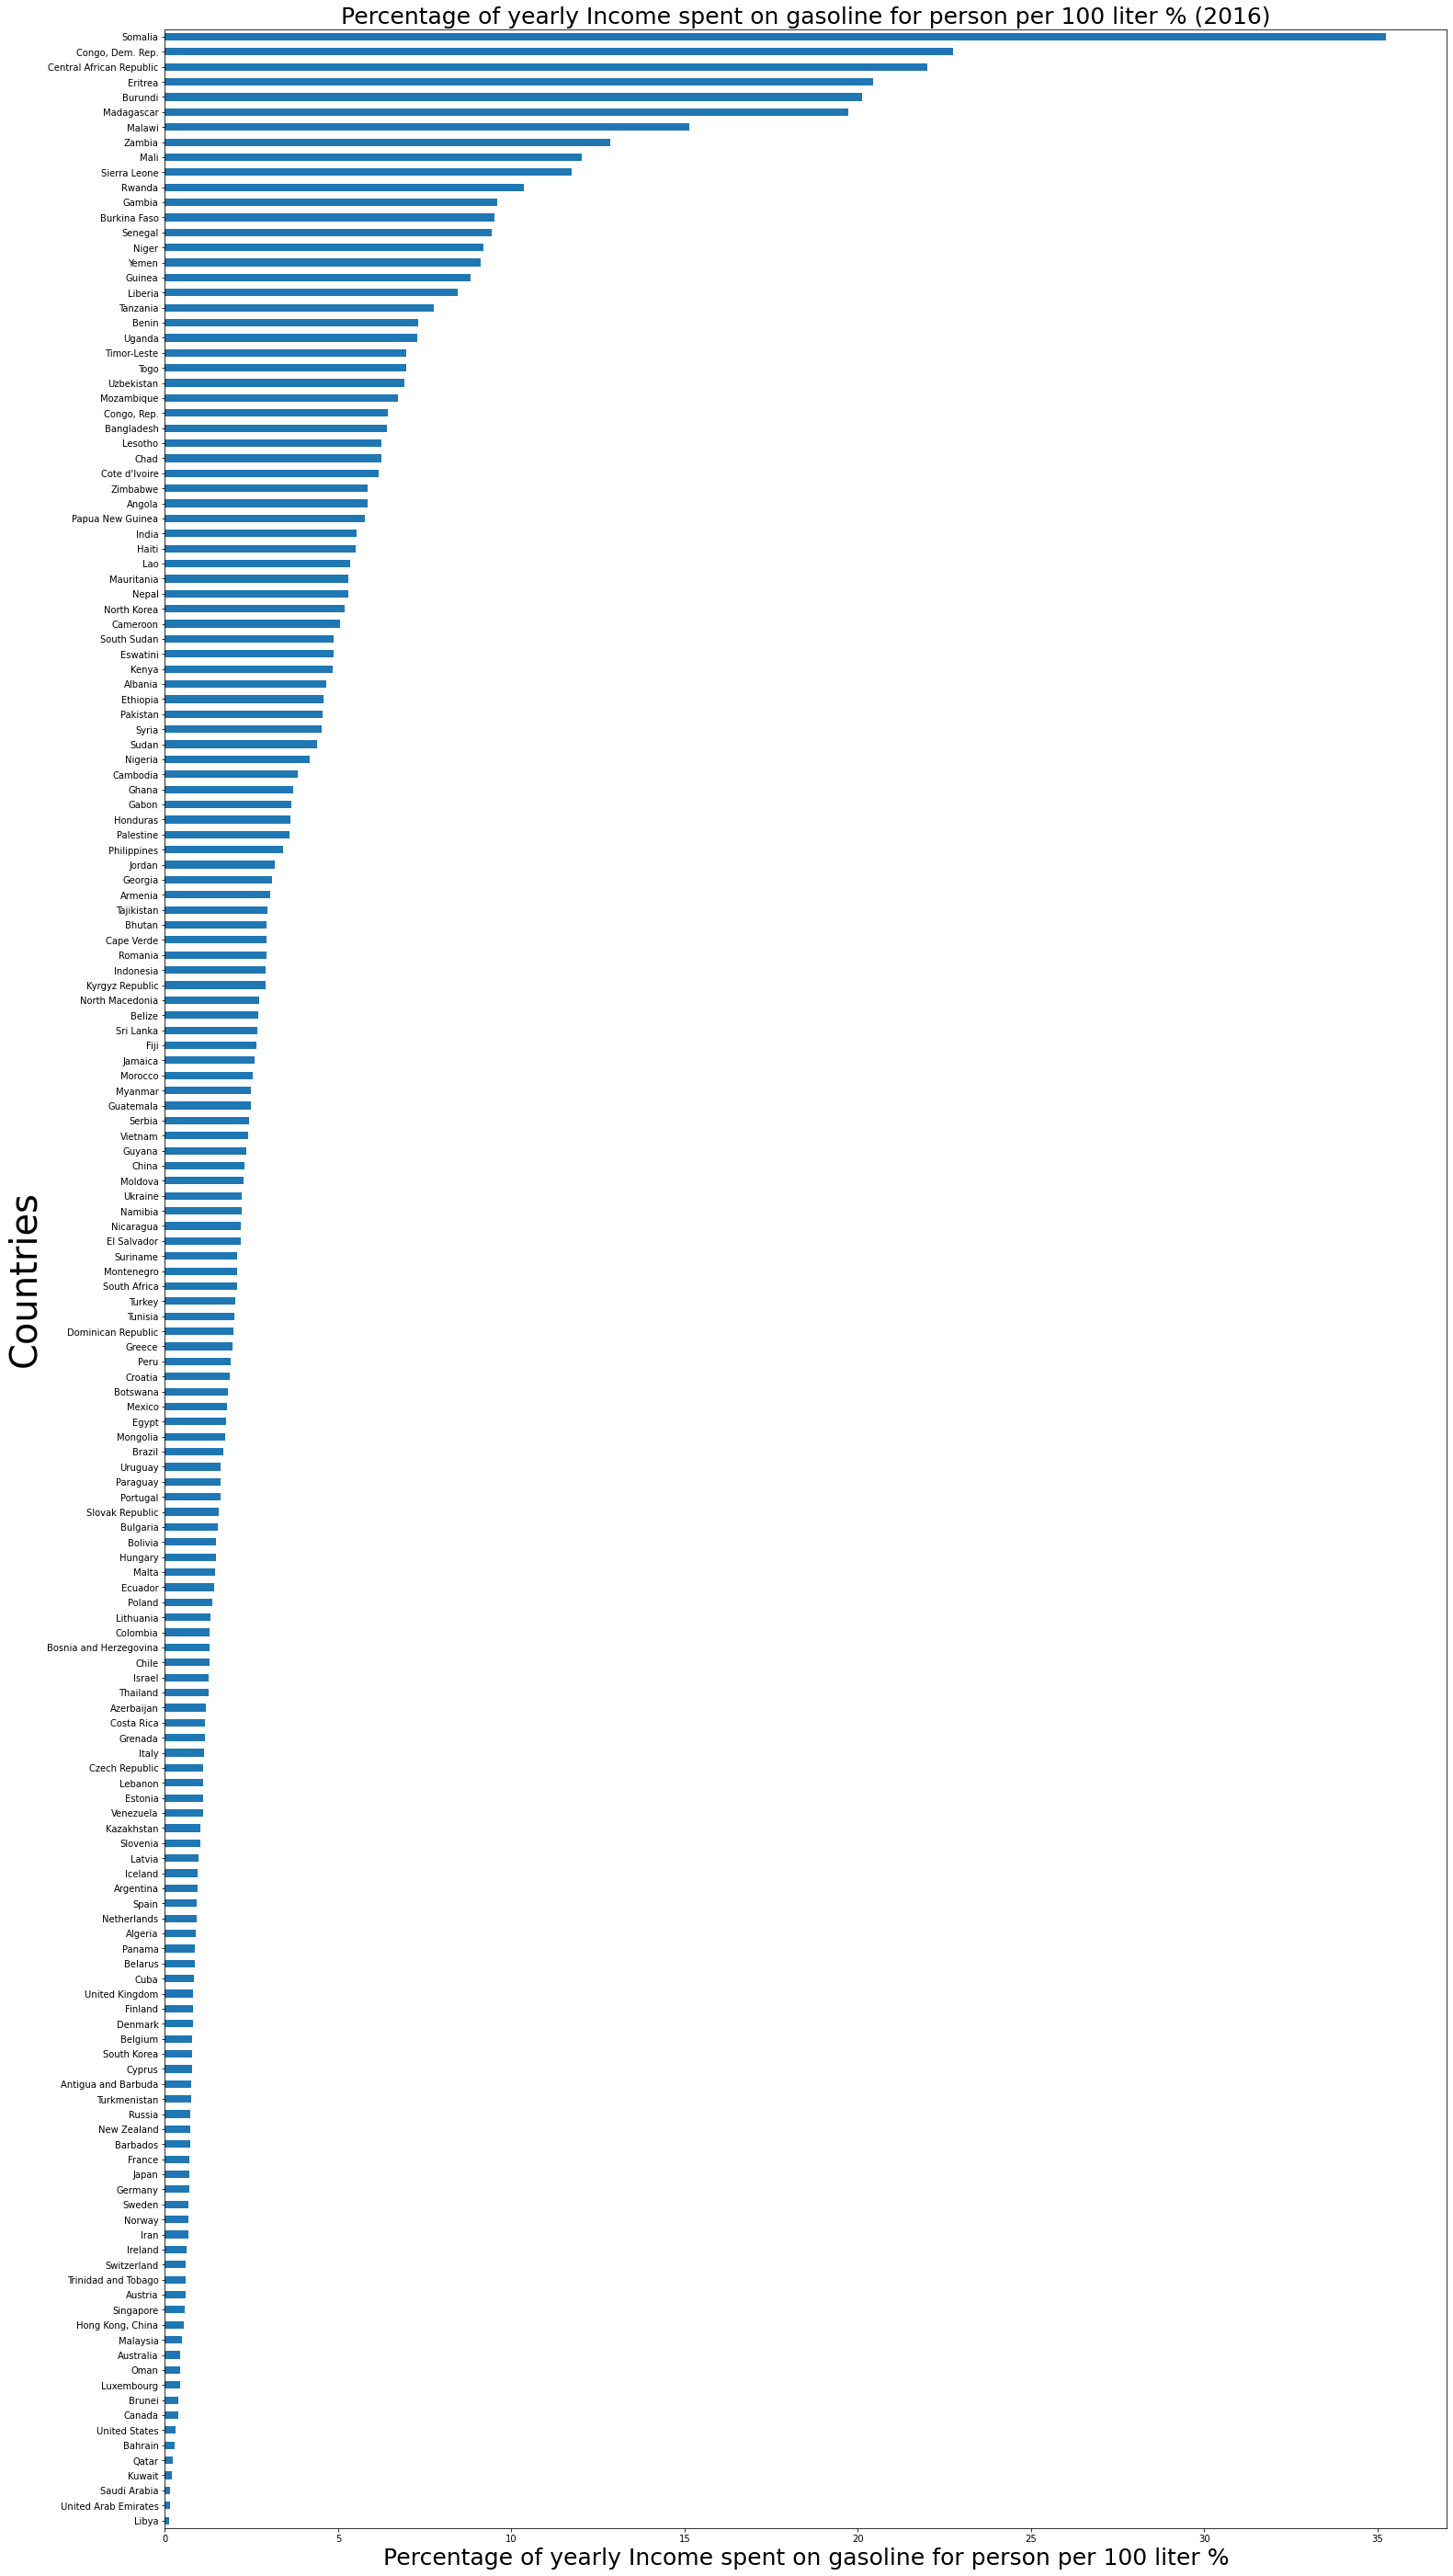

In [113]:
# draw 2016 data
data['2016'].sort_values().plot(kind='barh');
plt.rcParams['figure.figsize'] = [25, 50];
plt.title('Percentage of yearly Income spent on gasoline for person per 100 liter % (2016)',fontsize=25);
plt.xlabel('Percentage of yearly Income spent on gasoline for person per 100 liter %',fontsize=25);
plt.ylabel('Countries',fontsize=40);

>### **Conclusion**: 
Compare Egypt percentage of Income spent on gasoline per person to the World average percentage.

In [114]:
data.loc['World_Average'] = data.mean()
data.tail()

,1998,2000,2002,2004,2006,2008,2010,2012,2014,2016
country,,,,,,,,,,
Yemen,1.238095,1.060606,1.122995,1.073446,1.775148,1.840491,2.215190,3.790850,4.729730,9.108911
South Africa,1.799163,2.145923,1.647510,2.764505,2.591463,2.127139,2.813239,3.150685,2.674157,2.072072
Zambia,4.076923,5.973451,7.280081,10.476190,13.505155,17.763845,17.584746,14.800000,15.849057,12.844037
Zimbabwe,0.890411,3.113553,0.202429,3.227513,7.797619,10.077519,8.322581,7.562189,6.782609,5.851528
World_Average,2.934767,3.289585,3.036584,4.083206,4.565197,4.881945,5.190303,5.493530,5.218713,3.752890


In [115]:
data_to_plot = data.loc[['Egypt','World_Average']]
data_to_plot

,1998,2000,2002,2004,2006,2008,2010,2012,2014,2016
country,,,,,,,,,,
Egypt,1.518325,1.319797,1.016043,1.573034,1.685393,2.737430,2.539683,2.34375,4.190476,1.777778
World_Average,2.934767,3.289585,3.036584,4.083206,4.565197,4.881945,5.190303,5.49353,5.218713,3.752890


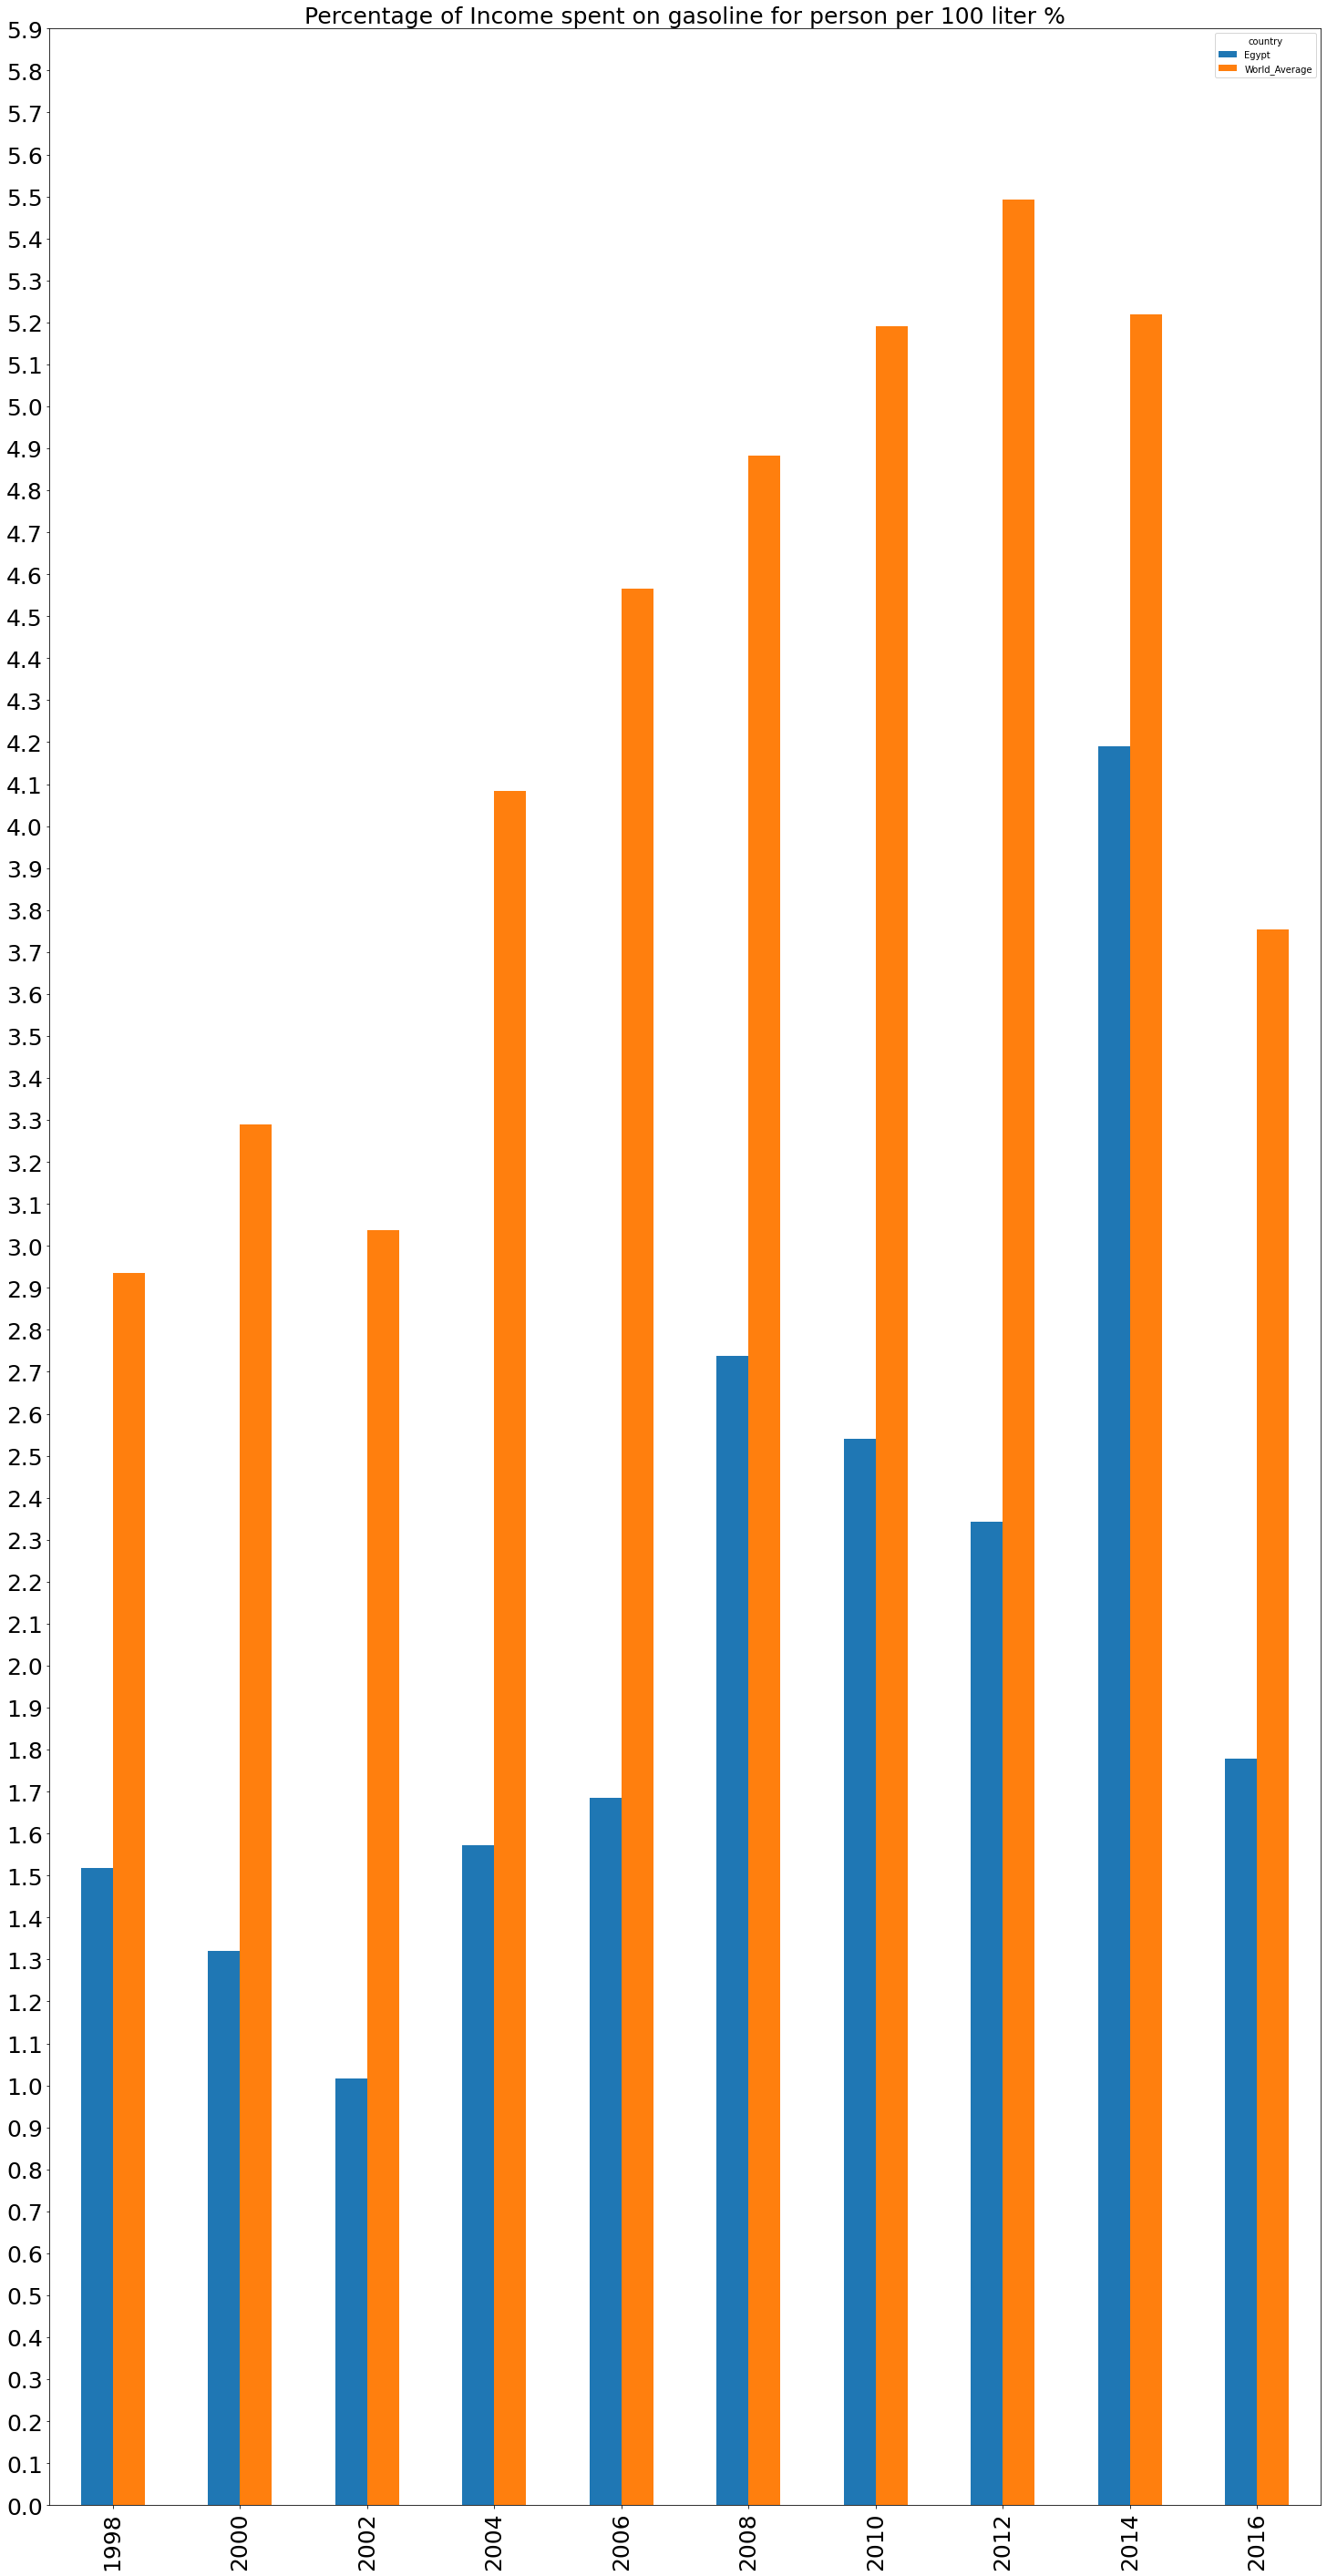

In [116]:
data_to_plot.T.plot(kind='bar', fontsize=25);
plt.title('Percentage of Income spent on gasoline for person per 100 liter %', fontsize=25);
plt.yticks(np.arange(0,6,0.1));


>## Conclusion:
Generally, we can find a positive correlation between average health spending per person and average life expectancy supporting the assumption that there is a relation between spending on public health and life expectancy. Comparing Egypt percentage of Income spent on gasoline per person to the World average percentage results that Egyptian spend on gasoline less than the average of other People around the world. With almost all countries increased their public health spending, their life expectancy also increased with different rates depending on health spending but not along all the way which indicates that there are more parameters to investigate, and more inferential statistical analysis need to be done to get accurate and nondeceptive results.


>## Limitations:
Inferential Statistics needed to be done to investigate other parameters effect the Life Expectancy in first investigation beside spending on Public Health. Other limitations in the second investigate such as incomplete gasoline prices Dataset, also a Dataset for consumption in every country is needed for more accurate results and comparison.

